<a href="https://colab.research.google.com/github/prieto06co/DataScienceI_84650-Entrega-N1-EdgarArmandoPrietoVargas/blob/main/ProyectoDSParteI%2BEdgarPrietoV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de Librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

Configuración Global Visual de graficos

In [3]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

Carga Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/prieto06co/DataScienceI_84650-Entrega-N1-EdgarArmandoPrietoVargas/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Traducción de columnas
column_translation = {
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'MonthlyCharges': 'Cargos_Mensuales',
    'TotalCharges': 'Cargos_Totales',
    'Churn': 'Abandono'
}
df = df.rename(columns=column_translation)
print("Nombres de columnas traducidos exitosamente.\n")

Nombres de columnas traducidos exitosamente.



Conversión de Datos

In [5]:
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce')
df['Cargos_Totales'] = df['Cargos_Totales'].fillna(0)
print("Limpieza de 'Cargos_Totales' completada.\n")

Limpieza de 'Cargos_Totales' completada.



Análisis Exploratorio de Datos (EDA)

In [6]:
print("Información general del dataset:")
df.info()
print("\n")

print("Primeras 5 filas del dataset:")
print(df.head())
print("\n")

print("Estadísticas descriptivas de las variables numéricas:")
print(df.describe())
print("\n")

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7043 non-null   object 
 1   Genero                   7043 non-null   object 
 2   Ciudadano_Mayor          7043 non-null   int64  
 3   Pareja                   7043 non-null   object 
 4   Dependientes             7043 non-null   object 
 5   Antiguedad               7043 non-null   int64  
 6   Servicio_Telefono        7043 non-null   object 
 7   Multiples_Lineas         7043 non-null   object 
 8   Servicio_Internet        7043 non-null   object 
 9   Seguridad_Online         7043 non-null   object 
 10  Copia_Seguridad_Online   7043 non-null   object 
 11  Proteccion_Dispositivo   7043 non-null   object 
 12  Soporte_Tecnico          7043 non-null   object 
 13  Streaming_TV             7043 non-null   obje

Planteamiento de Hiótesis:

1. Hipótesis sobre el tipo de Contrato
Hipótesis Nula (H0): No hay una relación entre el tipo de contrato del cliente (mes a mes, un año, dos años) y la probabilidad de que abandone.

  Hipótesis Alternativa (Ha): Sí hay una relación entre el tipo de contrato y la probabilidad de que el cliente abandone.

2. Hipótesis sobre el Método de Pago
Hipótesis Nula (H0): No hay una relación entre el método de pago utilizado por el cliente y la probabilidad de que abandone.

  Hipótesis Alternativa (Ha): Sí hay una relación entre el método de pago y la probabilidad de que el cliente abandone.

3. Hipótesis sobre los Factores Sociodemográficos
Hipótesis Nula (H0): No hay una relación entre los factores sociodemográficos (ser Ciudadano_Mayor o tener Pareja) y la probabilidad de que el cliente abandone.

  Hipótesis Alternativa (Ha): Sí hay una relación entre los factores sociodemográficos y la probabilidad de que el cliente abandone

Generación de Graficos.

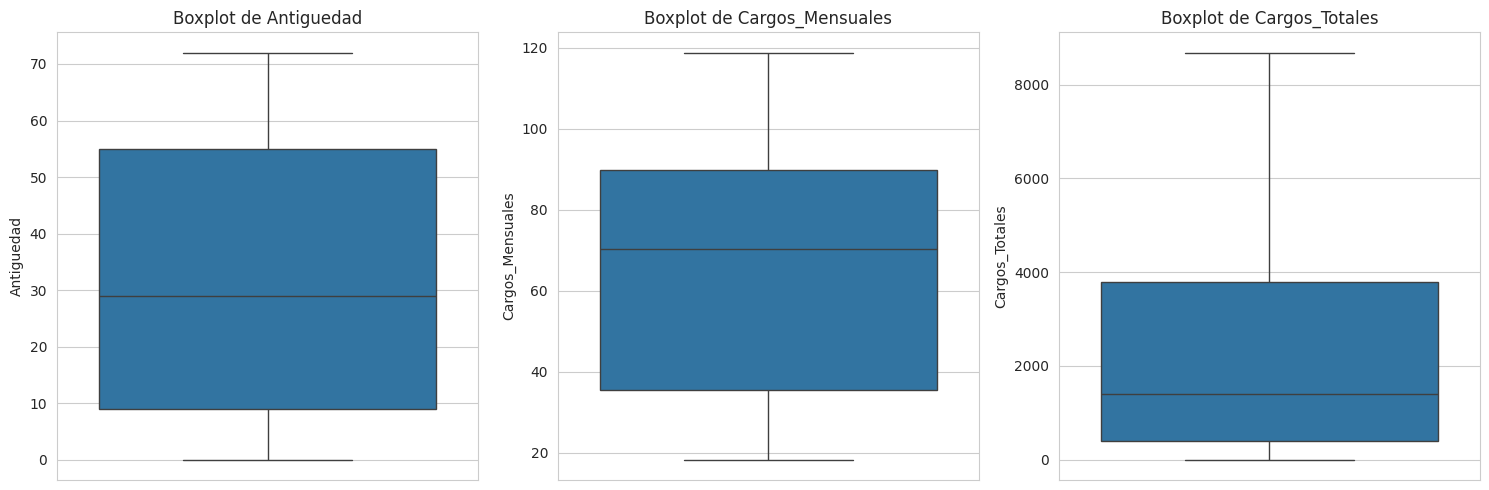

In [23]:
plt.figure(figsize=(15, 5))
numerical_cols_eda = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales']
for i, col in enumerate(numerical_cols_eda):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Qué muestra un gráfico Boxplot o de distribución: La distribución de los datos y los posibles valores atípicos (outliers) para las variables númericas.

* Antigüedad: Muestra que hay una gran cantidad de clientes muy nuevos y otra gran cantidad de clientes que han estado por mucho tiempo. Esto crea una distribución no uniforme, indicando que la empresa tiene tanto clientes nuevos como muy leales.

* Cargos Mensuales: La distribución es bastante uniforme y no muestra muchos valores extremos. Esto sugiere que los planes de servicio tienen precios que se distribuyen de manera consistente.

* Cargos Totales: La distribución es altamente sesgada hacia la izquierda, lo que significa que la mayoría de los clientes tienen cargos totales bajos. Esto tiene sentido, ya que los clientes nuevos no han acumulado grandes cargos totales.



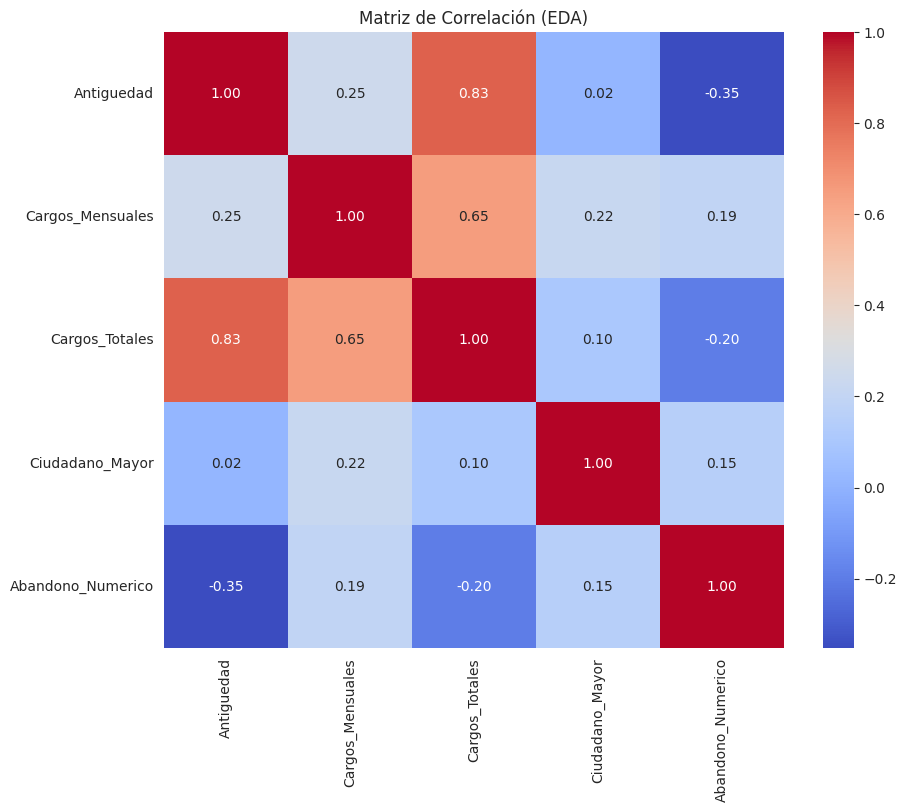

In [24]:
# Para el análisis de correlación con 'Abandono', se debe codificar la variable a numérica (0 y 1).
df['Abandono_Numerico'] = df['Abandono'].apply(lambda x: 1 if x == 'Yes' else 0)
variables_analisis = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales', 'Ciudadano_Mayor', 'Abandono_Numerico']
correlation_matrix = df[variables_analisis].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (EDA)')
plt.show()

Qué muestra un gráfico tipo Matriz de Correlación o Mapa de Calor: La relación lineal entre las variables numéricas. Un valor cercano a 1 indica una correlación positiva fuerte, y un valor cercano a -1 indica una correlación negativa fuerte.

* La correlación más fuerte y negativa es entre Antiguedad y Abandono (-0.35). Esto nos dice que, a mayor tiempo del cliente en la empresa, menor es la probabilidad de que abandone. Esta es una confirmación sólida para nuestra hipótesis, ya que la antigüedad refleja el nivel de compromiso y lealtad.

* También hay una correlación positiva, aunque moderada, entre Cargos_Mensuales y Abandono (0.19). Esto sugiere que los clientes con facturas más altas son un segmento con mayor riesgo de churn.


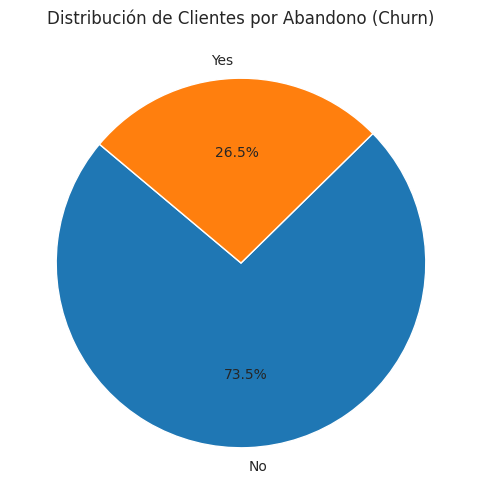

In [25]:
plt.figure(figsize=(6, 6))
churn_counts = df['Abandono'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Clientes por Abandono (Churn)')
plt.show()

Qué muestra el gráfico Pastel: Nos da una vista rápida del balance.

* El gráfico muestra que el 73.5% de los clientes no han abandonado, mientras que el 26.5% sí lo han hecho.

Esto nos revela una clara desproporción entre las clases. Si un modelo simplemente predijera que ningún cliente abandona, tendría una precisión del 73.5%. Por lo tanto, esta información es vital, ya que el desbalance de clases es un desafío que deberemos enfrentar en el futuro para que el modelo no se incline a predecir solo la clase mayoritaria



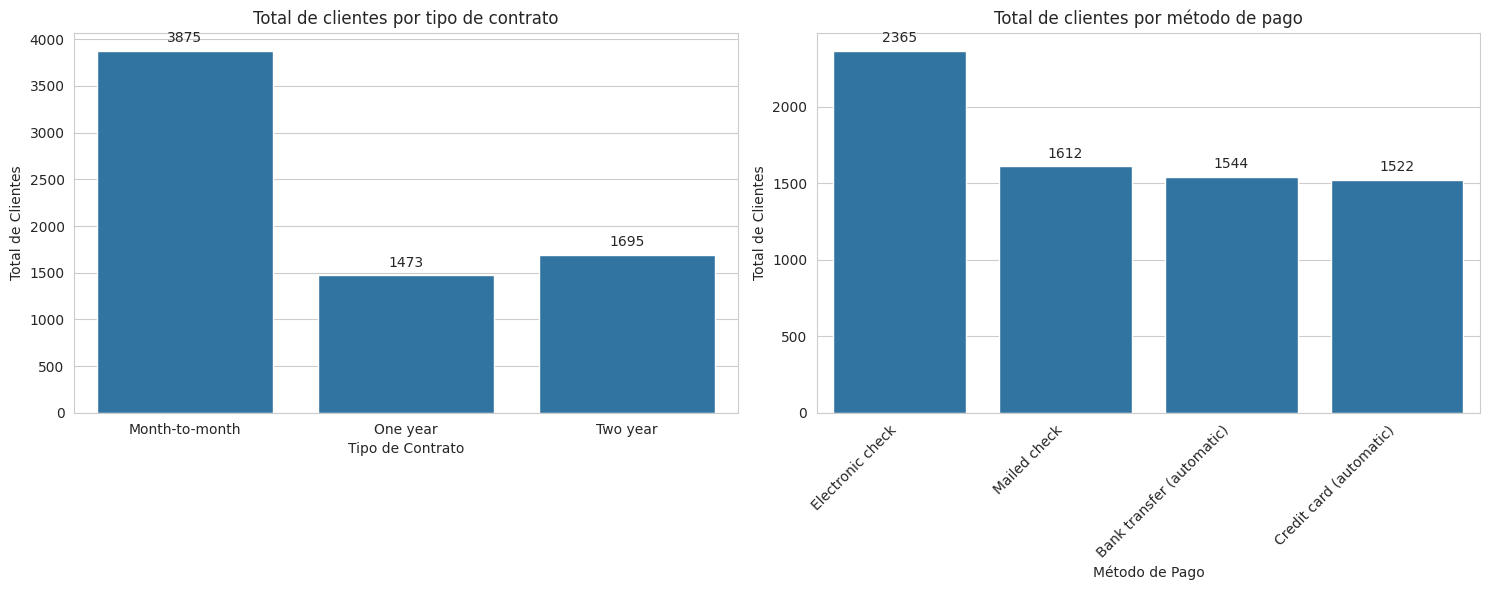

In [26]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Contrato', data=df)
plt.title('Total de clientes por tipo de contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Total de Clientes')

for p in ax1.patches:
    ax1.annotate(f'{round(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Metodo_Pago', data=df)
plt.title('Total de clientes por método de pago')
plt.xlabel('Método de Pago')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax2.patches:
    ax2.annotate(f'{round(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

plt.show()

Qué muestran los gráficos: Muestra la cantidad de una o más variables a graficar.

* Contrato: La mayoría de los clientes tiene un contrato Mes a mes. Le siguen los contratos de Dos años y Un año.

* Método de Pago: El Cheque electrónico es el método de pago más popular, seguido por el Cheque por correo y las transferencias automáticas.


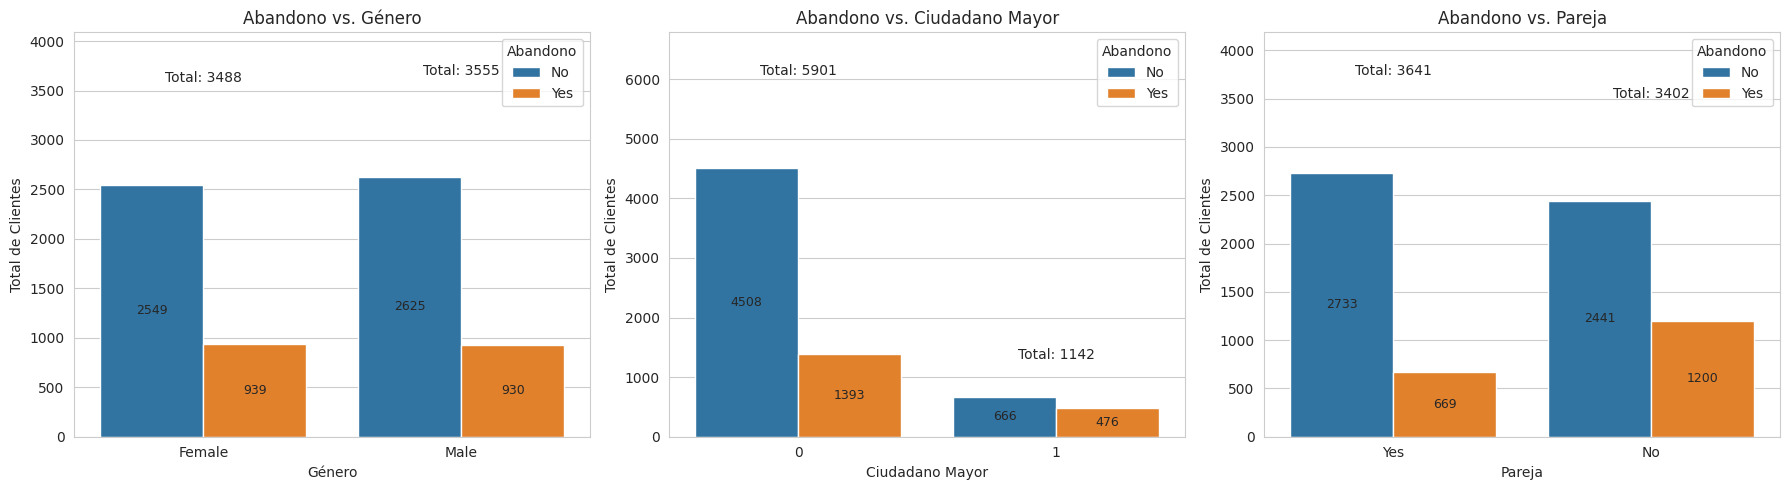

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax1 = sns.countplot(x='Genero', hue='Abandono', data=df, ax=axes[0])
ax1.set_title('Abandono vs. Género')
ax1.set_xlabel('Género')
ax1.set_ylabel('Total de Clientes')
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='center', fontsize=9)
total_counts = df.groupby('Genero')['Abandono'].count().reset_index()
for index, row in total_counts.iterrows():
    ax1.annotate(f'Total: {row["Abandono"]}',
                 xy=(index, row["Abandono"]),
                 ha='center', va='bottom',
                 xytext=(0, 5),
                 textcoords='offset points',
                 fontsize=10)
ax1.set_ylim(0, total_counts['Abandono'].max() * 1.15)

ax2 = sns.countplot(x='Ciudadano_Mayor', hue='Abandono', data=df, ax=axes[1])
ax2.set_title('Abandono vs. Ciudadano Mayor')
ax2.set_xlabel('Ciudadano Mayor')
ax2.set_ylabel('Total de Clientes')
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='center', fontsize=9)
total_counts = df.groupby('Ciudadano_Mayor')['Abandono'].count().reset_index()
for index, row in total_counts.iterrows():
    ax2.annotate(f'Total: {row["Abandono"]}',
                 xy=(index, row["Abandono"]),
                 ha='center', va='bottom',
                 xytext=(0, 5),
                 textcoords='offset points',
                 fontsize=10)
ax2.set_ylim(0, total_counts['Abandono'].max() * 1.15)

ax3 = sns.countplot(x='Pareja', hue='Abandono', data=df, ax=axes[2])
ax3.set_title('Abandono vs. Pareja')
ax3.set_xlabel('Pareja')
ax3.set_ylabel('Total de Clientes')
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='center', fontsize=9)
total_counts = df.groupby('Pareja')['Abandono'].count().reset_index()
for index, row in total_counts.iterrows():
    ax3.annotate(f'Total: {row["Abandono"]}',
                 xy=(index, row["Abandono"]),
                 ha='center', va='bottom',
                 xytext=(0, 5),
                 textcoords='offset points',
                 fontsize=10)
ax3.set_ylim(0, total_counts['Abandono'].max() * 1.15)


plt.tight_layout()
plt.show()

Qué muestran los gráficos: La relación entre variables.

Abandono vs. Género: La proporción de abandono entre hombres y mujeres es prácticamente idéntica. El género no parece ser un factor diferenciador para el churn.

Abandono vs. Ciudadano Mayor: Se puede observar que una proporción mucho mayor de Ciudadanos Mayores (1) abandonan el servicio en comparación con los que no lo son (0).

Abandono vs. Pareja: Una proporción más alta de clientes que no tienen pareja (No) abandonan el servicio en comparación con los que sí la tienen (Sí).
